<a href="https://colab.research.google.com/github/HamadSH1001/Employee-churn-prediction/blob/main/Employee%20churn%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <br><br>Churn Prediction (Binary Classification)<br><h1>

## Dataset Info

The dataset has 14,999 samples. We have two different kinds of employees, those who left the company and those who stayed. The dataset contains 10 columns:
- **Level of satisfaction:** the employee satisfaction index is on a 0–1 scale.
- **Last_evaluation:** the performance, which likewise goes from 0 to 1.
- **Number_projects:** how many projects has a worker been assigned?
- **Average hours per month:** how many hours did an employee work on average in a month?
- **Time_spent_company:** the length of time a worker has been employed by the company.
- **Work_accident:** indicates if a worker has experienced a work-related mishap.
- **Promotion_last_5years:** indicates if a worker has received a promotion within the previous five years.
- **Departments:** division or department in which the employee works.
- **Salary:** indicates the employee's pay range, which includes low, middle, and high.
- **Left (which is our target):** it indicates whether the worker has departed from the organization.


## Import Libraries and Dataset

In [ ]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/13

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score, precision_score, recall_score,roc_curve
from sklearn.utils import compute_class_weight, compute_sample_weight

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, minmax_scale
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from google.colab import files
import joblib

%matplotlib inline
plt.rcParams["figure.figsize"] = (7,6)

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## 1.0 EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = "INSTALL THE DATA SET FROM THE REPOSITORY THEN IMOPRT IT HERE"


In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.shape

(14999, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**From the previous cell we can see that:**
* Our data does not contain any null values.
* All the features are numeric except two categorical features (Departments and salary).

In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**From the previous table we can conclude that:**
* Satisfaction and monthly working hours vary significantly, which may impact turnover.
* A relatively small percentage of employees have received promotions, potentially impacting employee morale.
* Most employees do not experience workplace accidents.
* A notable portion of employees (nearly 24%) have left, which may suggest dissatisfaction or organizational instability.

In [ ]:
data.duplicated().sum()

3008

**In the previous cell we saw that we have ~3K duplicates which we will delete them.**

In [ ]:
data = data.drop_duplicates()

After deleting them we need to check the shape to make sure that everything went well!

In [ ]:
data.shape

(11991, 10)

### 1.1. Data Visualization

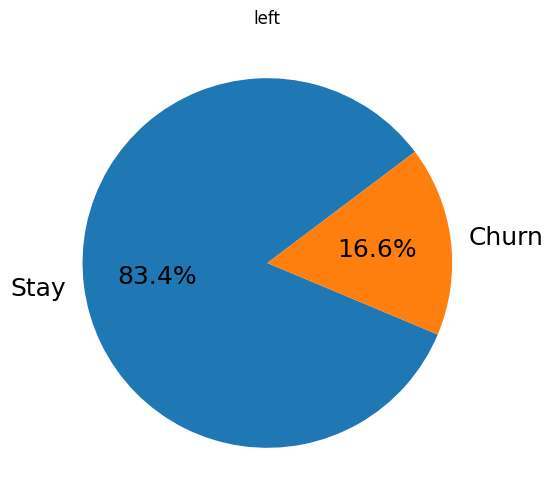

In [ ]:
data.left.value_counts().plot.pie(autopct='%1.1f%%',
                                  startangle=37,
                                  fontsize=18,
                                  labels=["Stay","Churn"],
                                  ylabel='',
                                  title='left');

**This graph shows severe imbalance**

---

** **bold text**We will check the distribution of the employees in each feature and the target**

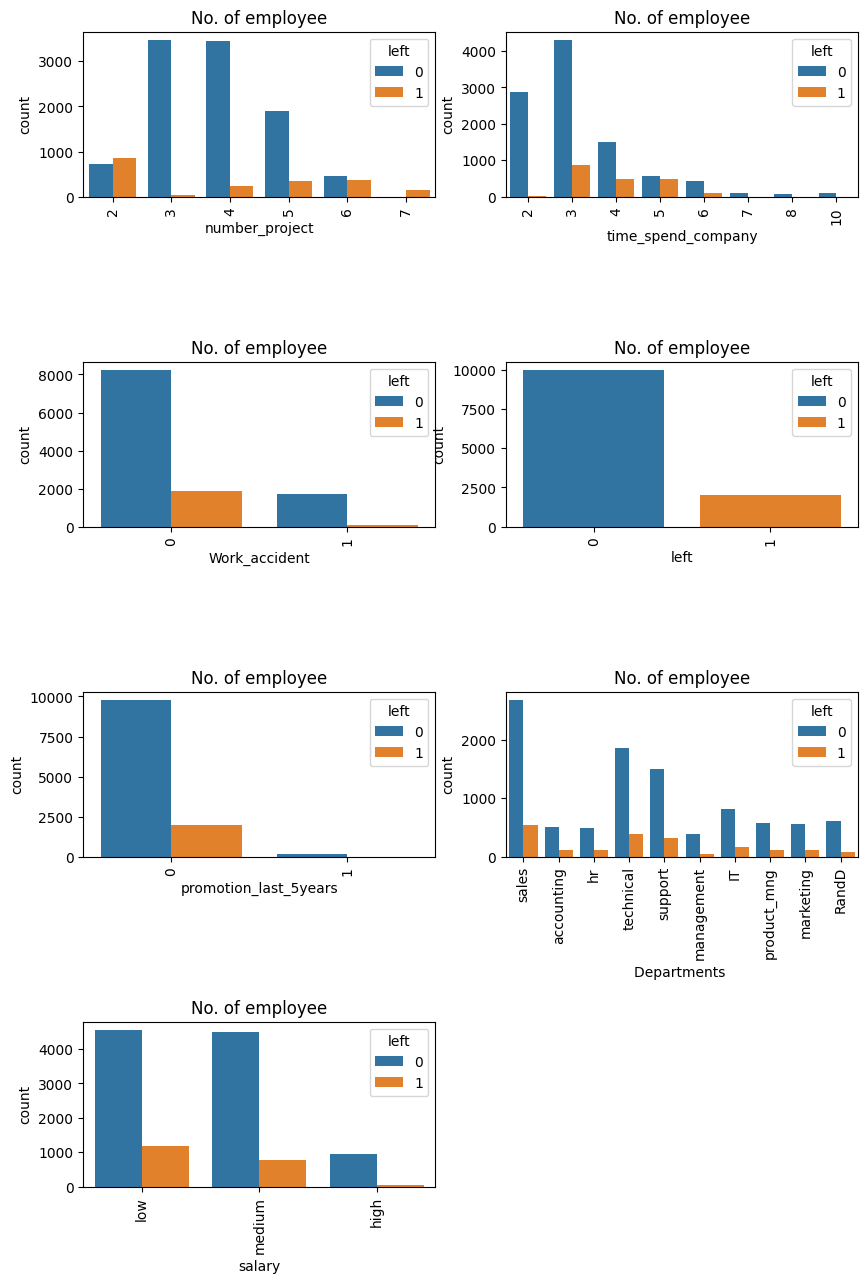

In [ ]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']

fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
     plt.subplot(4, 2, i+1)
     plt.subplots_adjust(hspace = 1.0)
     sns.countplot(x=j,data = data, hue='left')
     plt.xticks(rotation=90)
     plt.title("No. of employee")

The salary graph is interesting and it seems that there is a strong relationship, so we decided to take a closer lock!

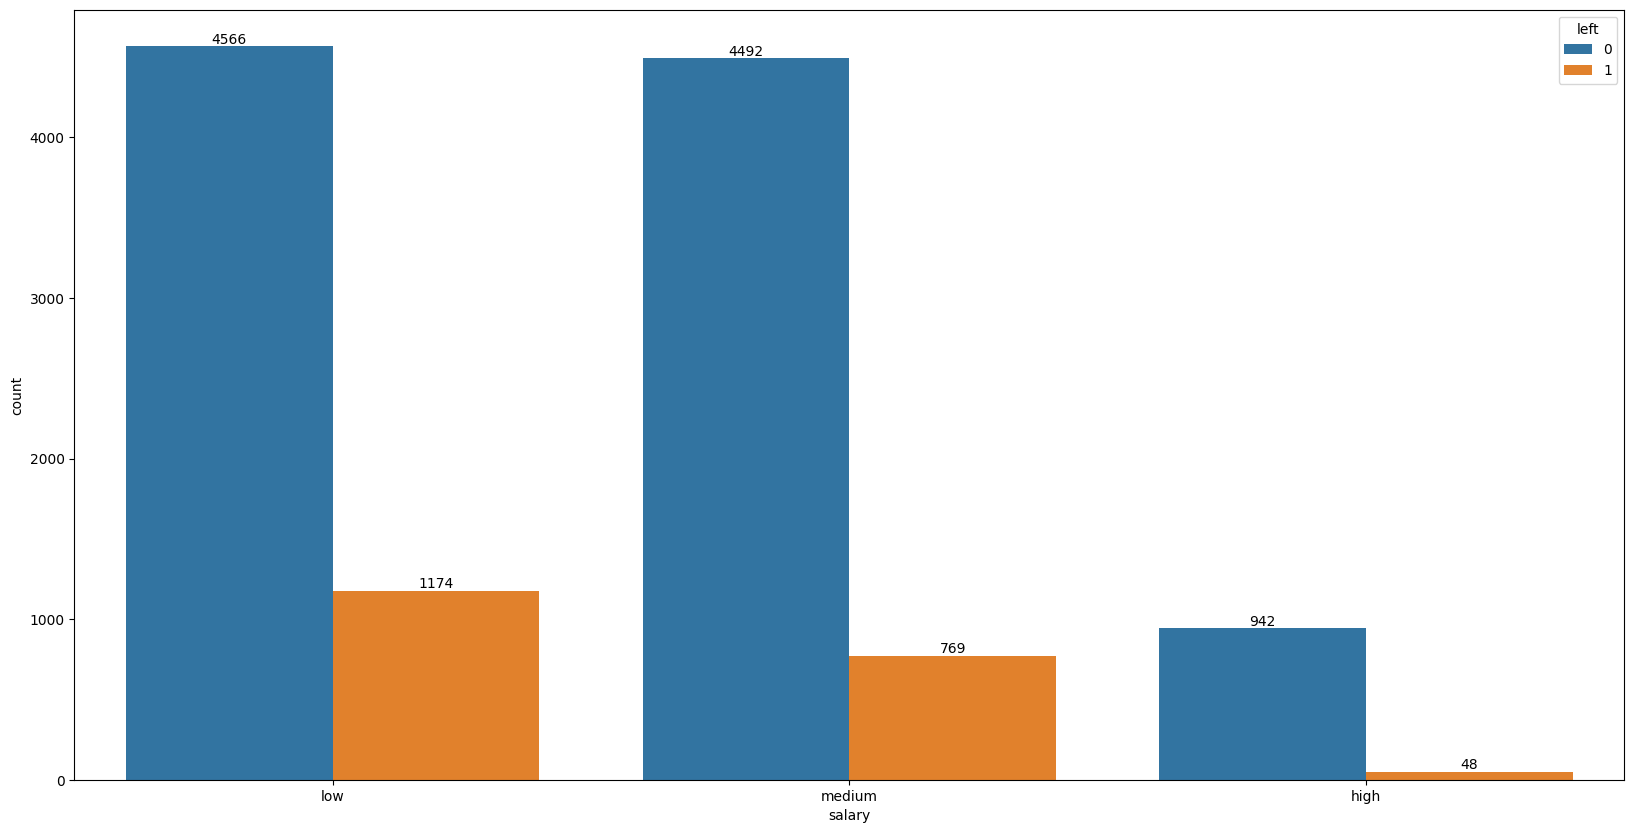

In [ ]:

plt.figure(figsize=(20,10))
ax = sns.countplot(x="salary", data=data, hue="left", dodge=True)

for p in ax.containers:
    ax.bar_label(p, label_type='edge')

plt.show()


We have tried to blot the percentages for clearer insight but we faced some difficulties so we calculated and the results are as follows:
- **25.7%** of low-paid employees left
- **17.1%** of medium-paid employees left
- **5%** of highly paid employees left

**From that we can say that, there is a strong positive relationship**

---

We will use the heatmap to check the multicollinearity

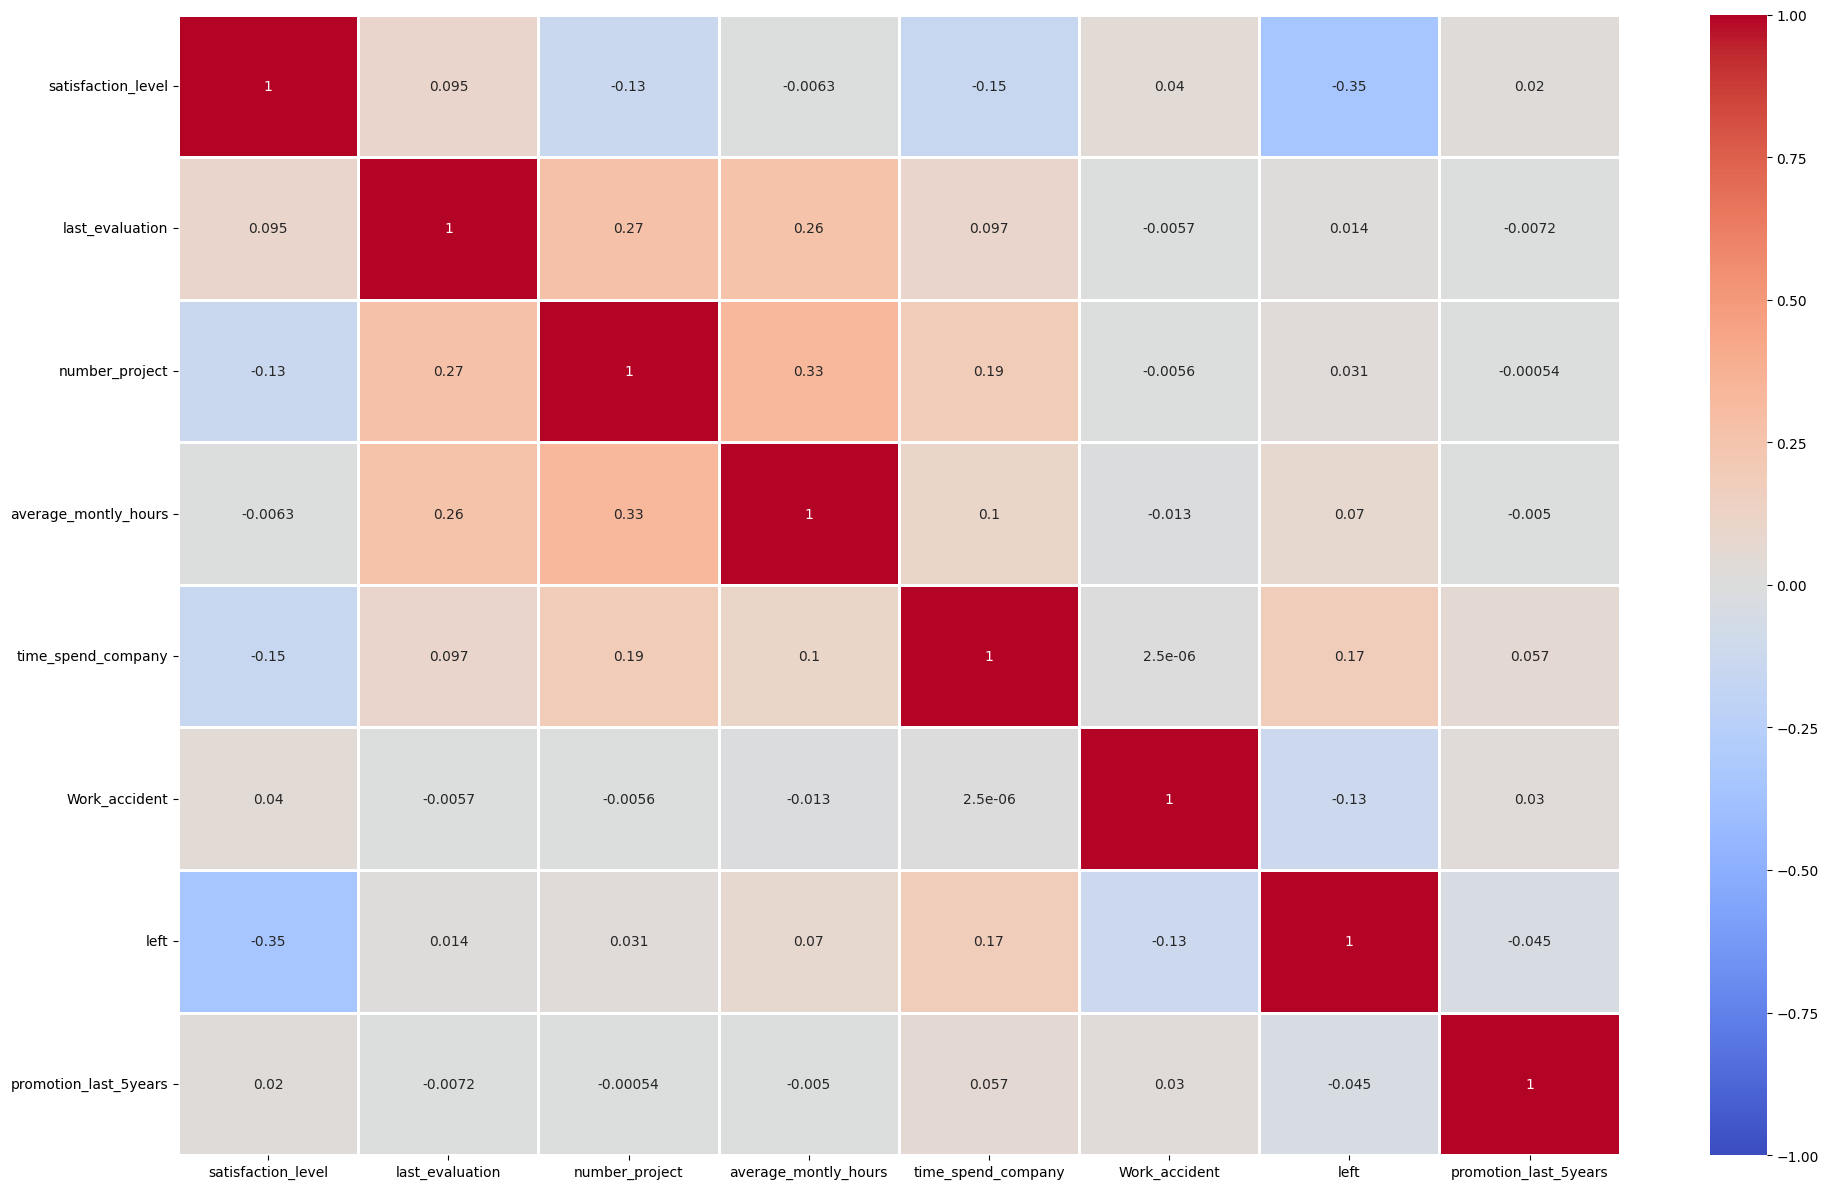

In [ ]:
#
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(numeric_only=True),annot=True,linewidth =2 ,   vmin=-1,  vmax=1, cmap="coolwarm")
plt.tight_layout()

Since all the values range from (-35%) to (+33%) we do not have to worry about multicollinearity.


## 2.0 Data Preprocessing

### 2.1 Train test spleting

In [ ]:
y= data['left']
X=data.drop('left', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42,shuffle=True)

- We splitted the data into a training set (80%) and a testing set (20%).
- We used "random_state=42" to get the same splitting in each run.
- we used "stratify=y" to ensure "y" diversity in both training and testing sets.

In [ ]:
print("X shape is:{} \t\t y shape is: {}".format(X.shape, y.shape))
print("X_train shape is:{} \t y_train shape is: {}".format(X_train.shape, y_train.shape))
print("X_test shape is:{} \t y_test shape is: {}".format(X_test.shape, y_test.shape))

X shape is:(11991, 9) 		 y shape is: (11991,)
X_train shape is:(9592, 9) 	 y_train shape is: (9592,)
X_test shape is:(2399, 9) 	 y_test shape is: (2399,)


### 2.2 Scaling

Since we have different ranges for each feature we will rescale them to be in the range of (0,1).

In [ ]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [ ]:

minmax_scaler = Pipeline(steps=[('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(
    remainder = 'passthrough', # keap unmintioned columns as they are
    transformers = [
        ('minmax', minmax_scaler, ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'])
    ]
)

**To avoid data leakage, we used fit_transform only on training data then we used transform on testing data**

In [ ]:
X_train = preprocessor.fit_transform(X_train);
X_test = preprocessor.transform(X_test);

In [ ]:
X_train= pd.DataFrame(X_train, columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Departments ', 'salary'])
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.978022,0.859375,0.4,0.672897,0.125,0,0,technical,low
1,0.593407,0.828125,0.2,0.668224,0.125,0,0,IT,medium
2,0.835165,0.359375,0.2,0.649533,0.125,0,0,support,low
3,0.516484,0.046875,0.2,0.046729,0.75,0,0,management,high
4,0.450549,0.609375,0.8,0.14486,0.125,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
9587,0.879121,0.84375,0.4,0.266355,0.125,0,0,support,low
9588,0.527473,0.09375,0.0,0.71028,0.25,0,0,IT,medium
9589,0.835165,0.515625,0.6,0.827103,0.125,1,0,hr,low
9590,0.626374,0.40625,0.2,0.224299,0.125,0,0,management,low


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_test= pd.DataFrame(X_test, columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Departments ', 'salary'])
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.978022,0.125,0.4,0.271028,0.5,1,0,sales,medium
1,0.340659,0.203125,0.0,0.182243,0.125,0,0,sales,low
2,0.230769,0.484375,0.2,0.635514,0.125,0,0,sales,low
3,0.956044,0.25,0.4,0.616822,0.125,0,0,sales,low
4,0.010989,0.953125,1.0,0.738318,0.25,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
2394,0.384615,0.484375,0.6,0.345794,0.125,1,0,marketing,medium
2395,0.362637,0.21875,0.6,0.88785,0.25,0,0,sales,high
2396,0.758242,0.203125,0.2,0.598131,0.125,0,0,sales,low
2397,0.142857,0.53125,0.0,0.831776,1.0,0,0,sales,high


### 2.3 Encoding

We will create a pipeline to encode categorical features using:
* Ordinal encoder for ordinal features
* One hot encoder for nundinal features

In [ ]:

cat_onehot = ["Departments "]
cat_ordinal =["salary"]
cat_for_salary = ["low", "medium", "high"]


column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),

                        (OrdinalEncoder(categories= [cat_for_salary],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,cat_ordinal),

                         verbose_feature_names_out=False, remainder="passthrough")



column_trans=column_trans.set_output(transform="pandas")

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans)]

pipe = Pipeline(steps=operations).set_output(transform="pandas")

**Again to avoid data leakage, we used fit_transform only on training data then we used transform on testing data**

In [ ]:
X_train=pipe.fit_transform(X_train)
X_train


,Departments _IT,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.978022,0.859375,0.4,0.672897,0.125,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.593407,0.828125,0.2,0.668224,0.125,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.835165,0.359375,0.2,0.649533,0.125,0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.516484,0.046875,0.2,0.046729,0.75,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.450549,0.609375,0.8,0.14486,0.125,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.879121,0.84375,0.4,0.266355,0.125,0,0
9588,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.527473,0.09375,0.0,0.71028,0.25,0,0
9589,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.835165,0.515625,0.6,0.827103,0.125,1,0
9590,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.626374,0.40625,0.2,0.224299,0.125,0,0


In [ ]:
X_test=pipe.transform(X_test)
X_test

,Departments _IT,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.978022,0.125,0.4,0.271028,0.5,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.340659,0.203125,0.0,0.182243,0.125,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.230769,0.484375,0.2,0.635514,0.125,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.956044,0.25,0.4,0.616822,0.125,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.010989,0.953125,1.0,0.738318,0.25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.384615,0.484375,0.6,0.345794,0.125,1,0
2395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.362637,0.21875,0.6,0.88785,0.25,0,0
2396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.758242,0.203125,0.2,0.598131,0.125,0,0
2397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.142857,0.53125,0.0,0.831776,1.0,0,0


#3.0 Modelling

## 3.1 **Logistic Regression**




In [ ]:
logis_model = LogisticRegression(class_weight='balanced',random_state=42)
logis_model= logis_model.fit(X_train,y_train)


logist_pred_train = logis_model.predict(X_train)
logis_pred= logis_model.predict(X_test)

#### 3.1.1 see the results on training to check overfitting

In [ ]:
print("Logistic Regression perfomence on training:")
print(classification_report(y_train, logist_pred_train))

ROCauc_logist_train = logis_model.predict_proba(X_train)[:, 1]
ROCauc_score_train= roc_auc_score(y_train, ROCauc_logist_train)
print(f"\nROC-AUC Score: {ROCauc_score_train}")



Logistic Regression perfomence on training:
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7999
           1       0.41      0.82      0.54      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.69      9592
weighted avg       0.86      0.77      0.80      9592


ROC-AUC Score: 0.8353450804074929


#### 3.1.2 Results on **testing** to check overfitting

In [ ]:
print("Logistic Regression perfomence on testing:")
print(classification_report(y_test, logis_pred))

ROCauc_logist = logis_model.predict_proba(X_test)[:, 1]
ROCauc_score_logis= roc_auc_score(y_test, ROCauc_logist)
f1_score_logis= f1_score(y_test, logis_pred)
print(f"F1 Score of Logistic model: {f1_score_logis}")
print(f"\nROC-AUC Score of: {ROCauc_score_logis}")



Logistic Regression perfomence on testing:
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2001
           1       0.42      0.84      0.56       398

    accuracy                           0.78      2399
   macro avg       0.69      0.81      0.71      2399
weighted avg       0.87      0.78      0.81      2399

F1 Score of Logistic model: 0.5630252100840336

ROC-AUC Score of: 0.8501138877797282


###3.1.3 confusion matrix for Logistic Regression

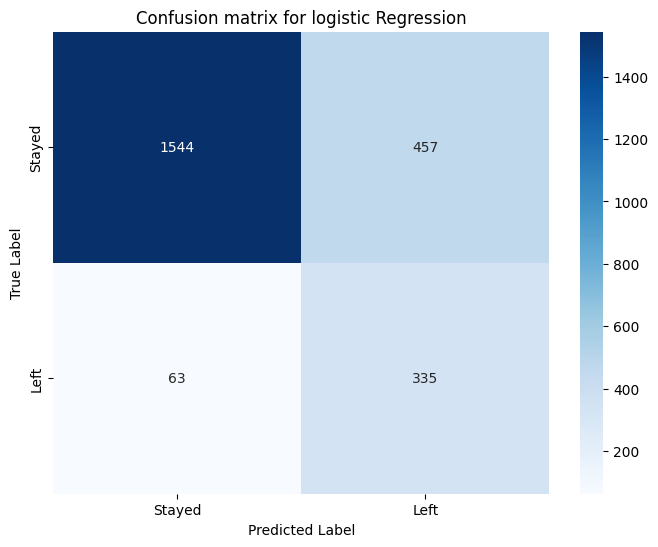

In [ ]:
cof_matrix = confusion_matrix(y_test, logis_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cof_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
          xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion matrix for logistic Regression')
plt.show()

##**3.2 SVM**




In [ ]:
SVM_model = SVC(class_weight='balanced', probability=True,random_state=42)
SVM_model = SVM_model.fit(X_train,y_train)


SVM_pred_train = SVM_model.predict(X_train)
SVM_pred = SVM_model.predict(X_test)


####3.2.1 Results on **training** to check overfitting

In [ ]:
print("SVM perfomence on training:")
print(classification_report(y_train, SVM_pred_train))

ROCauc_SVM_train = SVM_model.predict_proba(X_train)[:, 1]
ROCauc_score_train= roc_auc_score(y_train, ROCauc_SVM_train)
print(f"\nROC-AUC Score: {ROCauc_score_train}")

SVM perfomence on training:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      7999
           1       0.74      0.92      0.82      1593

    accuracy                           0.93      9592
   macro avg       0.86      0.93      0.89      9592
weighted avg       0.94      0.93      0.94      9592


ROC-AUC Score: 0.9679637449973149


####3.2.2 Results on **testing** to check overfitting

In [ ]:
print("SVM perfomence on testing:")
print(classification_report(y_test, SVM_pred))

ROCauc_SVM = SVM_model.predict_proba(X_test)[:, 1]
ROCauc_score_SVM= roc_auc_score(y_test, ROCauc_SVM)
f1_score_SVM= f1_score(y_test, SVM_pred)
print(f"F1 Score of SVM: {f1_score_SVM}")

print(f"\nROC-AUC Score: {ROCauc_score_SVM}")



SVM perfomence on testing:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      2001
           1       0.73      0.92      0.82       398

    accuracy                           0.93      2399
   macro avg       0.86      0.93      0.89      2399
weighted avg       0.94      0.93      0.93      2399

F1 Score of SVM: 0.8160535117056856

ROC-AUC Score: 0.9625312971654875


###3.2.3 confusion matrix of SVM

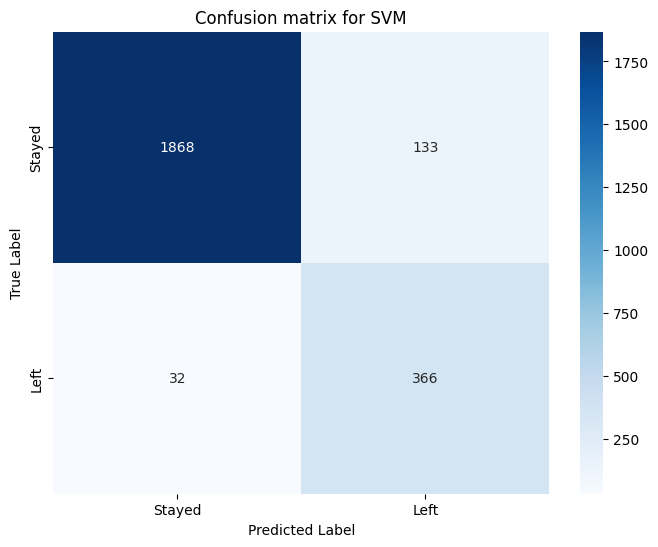

In [ ]:
cof_matrix = confusion_matrix(y_test, SVM_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cof_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
          xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion matrix for SVM')
plt.show()

##**3.3 Random Forest**

In [ ]:
forest_model = RandomForestClassifier(random_state=42,
                                   n_estimators=100,
                                   max_depth=10,
                                   min_samples_split=10,
                                   min_samples_leaf=5,
                                   class_weight='balanced'
                                  )

forest_model= forest_model.fit(X_train,y_train)

forset_pred_train = forest_model.predict(X_train)
forest_pred= forest_model.predict(X_test)


####3.3.1 Results on **training** to check overfitting

In [ ]:
print("Random forest performance on training ")
print(classification_report(y_train, forset_pred_train))


ROCauc_forest_train= forest_model.predict_proba(X_train)[:, 1]
ROCauc_score_train= roc_auc_score(y_train, ROCauc_forest_train)
print(f"\nROC-AUC Score: {ROCauc_score_train}")


Random forest performance on training 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7999
           1       0.97      0.93      0.95      1593

    accuracy                           0.98      9592
   macro avg       0.98      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592


ROC-AUC Score: 0.9964300308411119


####3.3.2 Results on **testing** to check overfitting

In [ ]:
print("Random forest performance on testing")
print(classification_report(y_test, forest_pred))

ROCauc_forest = forest_model.predict_proba(X_test)[:, 1]
ROCauc_score_forest= roc_auc_score(y_test, ROCauc_forest)
f1_score_forest= f1_score(y_test, forest_pred)
print(f"F1 Score of random forest: {f1_score_forest}")

print(f"\nROC-AUC Score: {ROCauc_score_forest}")


Random forest performance on testing
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2001
           1       0.97      0.92      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399

F1 Score of random forest: 0.9420849420849421

ROC-AUC Score: 0.9810886014279291


###3.3.3 confusion matrix of Random forest

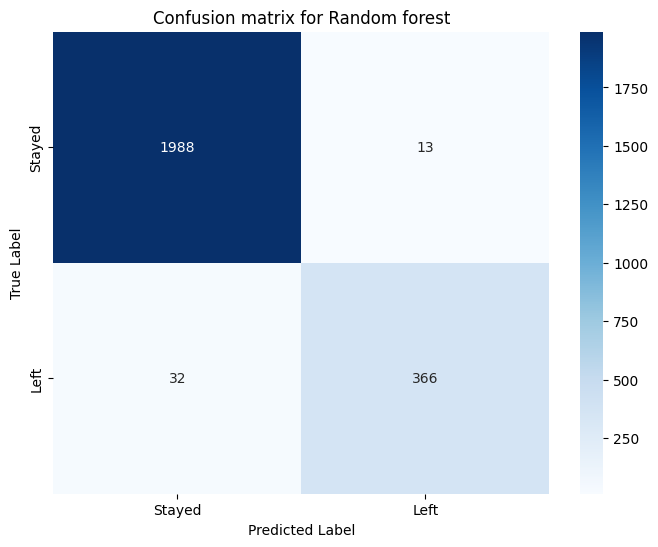

In [ ]:
cof_matrix = confusion_matrix(y_test, forest_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cof_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
          xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion matrix for Random forest')
plt.show()

##**3.4 Decision Tree**

In [ ]:
DT_model = DecisionTreeClassifier(class_weight='balanced',random_state=42,
                                  max_depth=5,
                                  min_samples_split=10,
                                  min_samples_leaf=5
                                  )
DT_model = DT_model.fit(X_train, y_train)
DT_pred_train = DT_model.predict(X_train)
DT_pred = DT_model.predict(X_test)

####3.4.1 Results on **training** to check overfitting

In [ ]:
print("Decision Tree performance on training:")
print(classification_report(y_train, DT_pred_train))

ROCauc_DT_train = DT_model.predict_proba(X_train)[:, 1]
ROCauc_score_train = roc_auc_score(y_train, ROCauc_DT_train)
print(f"\nROC-AUC Score (Training): {ROCauc_score_train}")

Decision Tree performance on training:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7999
           1       0.75      0.94      0.84      1593

    accuracy                           0.94      9592
   macro avg       0.87      0.94      0.90      9592
weighted avg       0.95      0.94      0.94      9592


ROC-AUC Score (Training): 0.9623398075418561


####3.4.2 Results on **testing** to check overfitting

In [ ]:
print("\nDecision Tree performance on testing:")
print(classification_report(y_test, DT_pred))

ROCauc_DT = DT_model.predict_proba(X_test)[:, 1]
ROCauc_score_DT = roc_auc_score(y_test, ROCauc_DT)

f1_score_DT= f1_score(y_test, DT_pred)
print(f"F1 Score of random forest: {f1_score_DT}")


print(f"\nROC-AUC Score : {ROCauc_score_DT}")


Decision Tree performance on testing:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2001
           1       0.75      0.94      0.83       398

    accuracy                           0.94      2399
   macro avg       0.87      0.94      0.90      2399
weighted avg       0.95      0.94      0.94      2399

F1 Score of random forest: 0.8346281908990011

ROC-AUC Score : 0.9496853332127906


###3.4.3 confusion matrix of Decision Tree

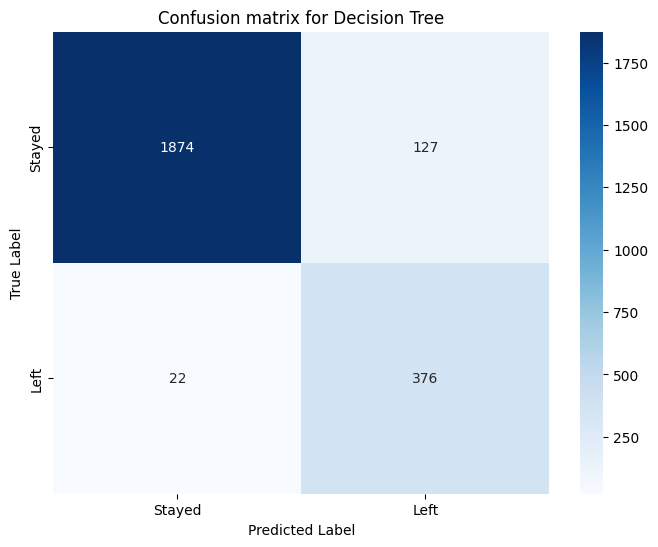

In [ ]:
cof_matrix = confusion_matrix(y_test, DT_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cof_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion matrix for Decision Tree')
plt.show()

## **3.5 Gradient Boosting**

In [ ]:
GB_model = GradientBoostingClassifier(random_state=42,
                                      learning_rate=0.05,
                                      n_estimators=100,)

GB_model = GB_model.fit(X_train, y_train)
GB_pred_train = GB_model.predict(X_train)
GB_pred = GB_model.predict(X_test)

####3.5.1 Results on **training** to check overfitting

In [ ]:
print("Gradient Boosting performance on training:")
print(classification_report(y_train, GB_pred_train))

ROCauc_GB_train = GB_model.predict_proba(X_train)[:, 1]
ROCauc_score_train = roc_auc_score(y_train, ROCauc_GB_train)
print(f"\nROC-AUC Score: {ROCauc_score_train}")

Gradient Boosting performance on training:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7999
           1       0.96      0.92      0.94      1593

    accuracy                           0.98      9592
   macro avg       0.97      0.96      0.96      9592
weighted avg       0.98      0.98      0.98      9592


ROC-AUC Score: 0.9853114486140647


####3.5.2 Results on **testing** to check overfitting

In [ ]:
print("\nGradient Boosting performance on testing:")
print(classification_report(y_test, GB_pred))

ROCauc_GB_test = GB_model.predict_proba(X_test)[:, 1]
ROCauc_score_GB = roc_auc_score(y_test, ROCauc_GB_test)
f1_score_GB= f1_score(y_test, GB_pred)

print(f"F1 Score of GB : {f1_score_GB}")
print(f"\nROC-AUC Score: {ROCauc_score_GB}")




Gradient Boosting performance on testing:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.95      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399

F1 Score of GB : 0.9389312977099237

ROC-AUC Score: 0.9812348850700279


###3.5.3 confusion matrix for Gradient Boosting

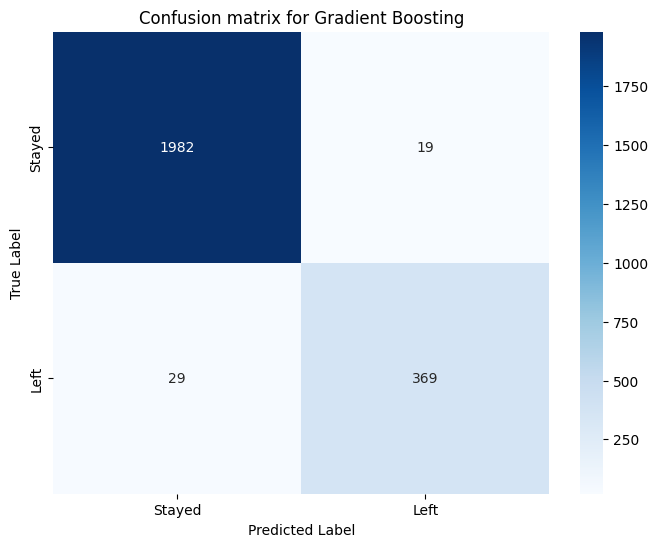

In [ ]:
cof_matrix = confusion_matrix(y_test, GB_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cof_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion matrix for Gradient Boosting')
plt.show()

### **3.5.4 Gradient Boosting with SMOTE**

In [ ]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

GBSMOTE_model = GradientBoostingClassifier(random_state=42,
                                      learning_rate=0.05,
                                      n_estimators=100
                                     )

GBSMOTE_fit = GBSMOTE_model.fit(X_train_resampled, y_train_resampled)

GBSMOTE_pred_train = GBSMOTE_model.predict(X_train_resampled)
GBSMOTE_pred = GBSMOTE_model.predict(X_test)


####3.5.4.1 Results on training to check overfitting

In [ ]:
print("Gradient Boosting with SMOTE performance on training:")
print(classification_report(y_train, GB_pred_train))

ROCauc_GBSMOTE_train = GBSMOTE_model.predict_proba(X_train_resampled)[:, 1]
ROCauc_GBSMOTEscore_train = roc_auc_score(y_train_resampled, ROCauc_GBSMOTE_train)
print(f"\nROC-AUC Score: {ROCauc_GBSMOTEscore_train}")



Gradient Boosting with SMOTE performance on training:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7999
           1       0.96      0.92      0.94      1593

    accuracy                           0.98      9592
   macro avg       0.97      0.96      0.96      9592
weighted avg       0.98      0.98      0.98      9592


ROC-AUC Score: 0.9934244655941412


####3.5.4.2 Results on testing to check overfitting

In [ ]:
print("\nGradient Boosting with SMOTE performance on testing:")
print(classification_report(y_test, GBSMOTE_pred))

ROCauc_GBSMOTE_test = GBSMOTE_model.predict_proba(X_test)[:, 1]
ROCauc_GBSMOTE_score = roc_auc_score(y_test, ROCauc_GBSMOTE_test)

f1_score_GBSMOTE= f1_score(y_test, GBSMOTE_pred)

print(f"F1 Score of GB : {f1_score_GBSMOTE}")
print(f"\nROC-AUC Score : {ROCauc_GBSMOTE_score}")


Gradient Boosting with SMOTE performance on testing:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2001
           1       0.86      0.93      0.90       398

    accuracy                           0.96      2399
   macro avg       0.92      0.95      0.94      2399
weighted avg       0.97      0.96      0.96      2399

F1 Score of GB : 0.8953068592057761

ROC-AUC Score : 0.979995554986326


####3.5.4.3 confusion matrix for Gradient Boosting with SMOTE

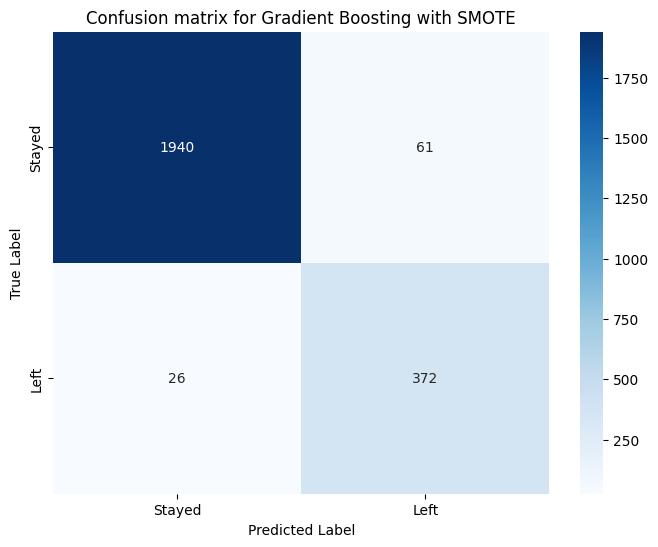

In [ ]:
cof_matrix = confusion_matrix(y_test, GBSMOTE_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cof_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion matrix for Gradient Boosting with SMOTE')
plt.show()


##**3.6 Soft Voting Classifier**

In [ ]:
SVclf = VotingClassifier(estimators=[
    ('rf', forest_model),
    ('gb', GB_model),
    ('dt', DT_model),
      ('svm',SVM_model)],
    voting='soft')

SVclf=SVclf.fit(X_train, y_train)

SVclf_pred= SVclf.predict(X_test)



#### 3.6.1 Result of Soft voting clf

In [ ]:
print("\n Soft Voting clf performance :")

print(classification_report(y_test, SVclf_pred))

f1_score_SV= f1_score(y_test, SVclf_pred)
print(f"F1 Score of Soft voting clf: {f1_score_SV}")

ROCauc_SV_test = SVclf.predict_proba(X_test)[:, 1]
ROCauc_score_SV = roc_auc_score(y_test, ROCauc_SV_test)
print(f" Soft voting clf ROC-AUC Score: {ROCauc_score_SV}")




 Soft Voting clf performance :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.94      0.92      0.93       398

    accuracy                           0.98      2399
   macro avg       0.96      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399

F1 Score of Soft voting clf: 0.934010152284264
 Soft voting clf ROC-AUC Score: 0.9796973372610177


###3.6.2 Confusion Matrix for Voting clf

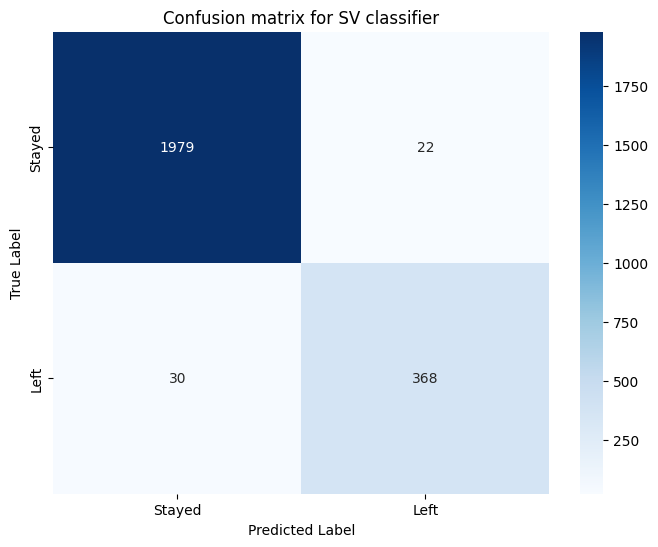

In [ ]:
cof_matrix = confusion_matrix(y_test, SVclf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cof_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion matrix for SV classifier')
plt.show()

#**4.0 Results after comparing models**

In [ ]:
modeles = ["Logistic regression", "SVM ", "Random forest",
           "Gradient boosting","Gradient boosting with SMOTE", "Decision tree", "Voting classifier"]
F1_score_values= [f1_score_logis, f1_score_SVM, f1_score_forest,
                  f1_score_GB,f1_score_GBSMOTE, f1_score_DT,f1_score_SV]

ROCauc_score_values= [ROCauc_score_logis, ROCauc_score_SVM, ROCauc_score_forest,
                      ROCauc_score_GB,ROCauc_GBSMOTE_score, ROCauc_score_DT,ROCauc_score_SV]



models_results = pd.DataFrame({
    "Model": modeles,
    "F1": F1_score_values,
    "ROC-AUC": ROCauc_score_values
})

models_results


,Model,F1,ROC-AUC
0,Logistic regression,0.563025,0.850114
1,SVM,0.816054,0.962531
2,Random forest,0.942085,0.981089
3,Gradient boosting,0.938931,0.981235
4,Gradient boosting with SMOTE,0.895307,0.979996
5,Decision tree,0.834628,0.949685
6,Voting classifier,0.934010,0.979697


In [ ]:
# Melt the DataFrame for easier plotting
models_results = models_results.melt(id_vars="Model", var_name="Metric", value_name="Score")
models_results

,Model,Metric,Score
0,Logistic regression,F1,0.563025
1,SVM,F1,0.816054
2,Random forest,F1,0.942085
3,Gradient boosting,F1,0.938931
4,Gradient boosting with SMOTE,F1,0.895307
5,Decision tree,F1,0.834628
6,Voting classifier,F1,0.934010
7,Logistic regression,ROC-AUC,0.850114
8,SVM,ROC-AUC,0.962531
9,Random forest,ROC-AUC,0.981089


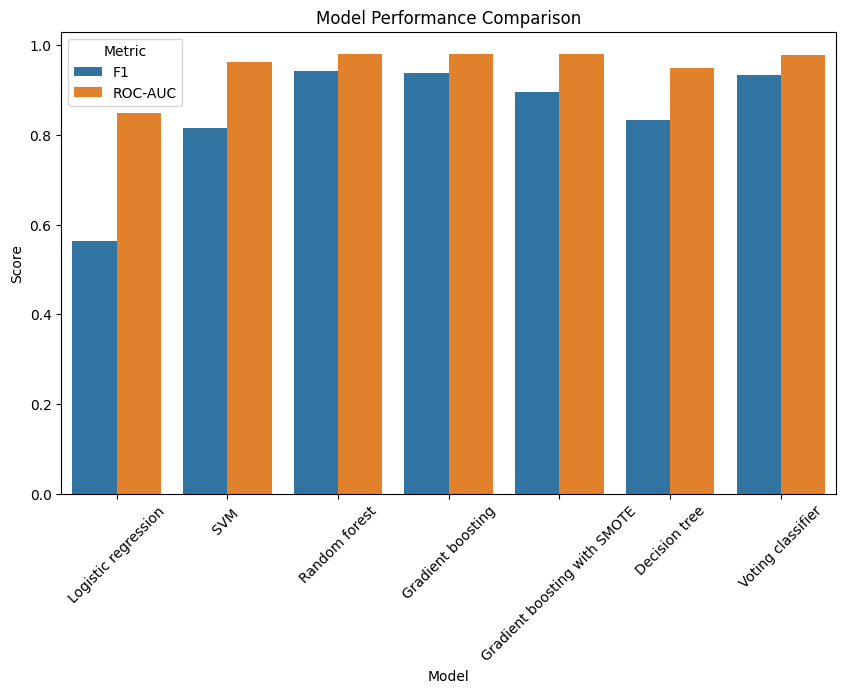

In [ ]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=models_results, x="Model", y="Score", hue="Metric")
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

###4.1 Visualizing important features

In [ ]:
feature_names= X_train.columns

importances = forest_model.feature_importances_

import_features = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


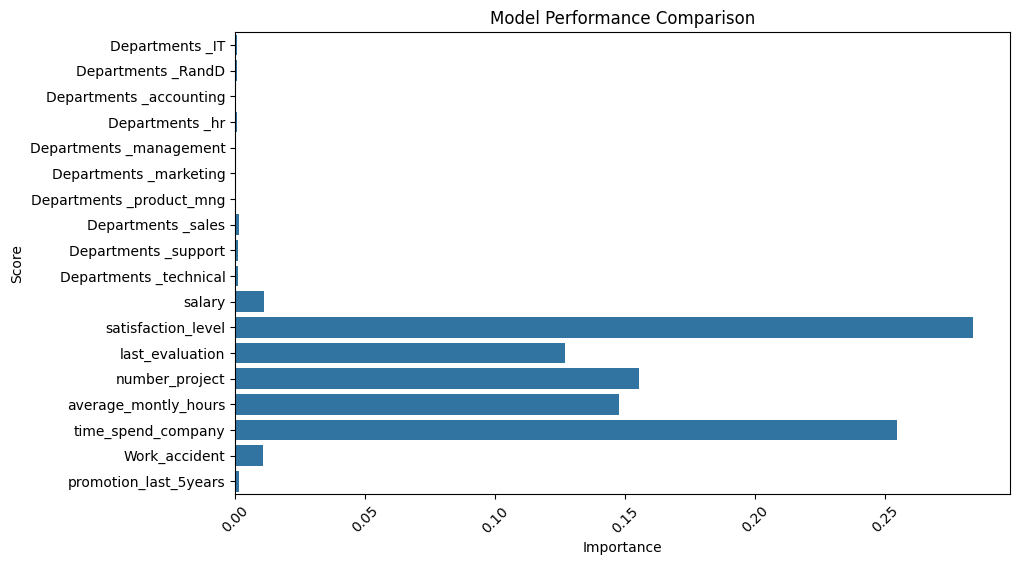

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=import_features, y='Feature', x='Importance',)
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

#**5.0 User Interface**

##5.1 Selecting optimal threshold

In [ ]:
fpr ,tpr ,thresholds = roc_curve(y_test, ROCauc_forest)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.6696721450048788


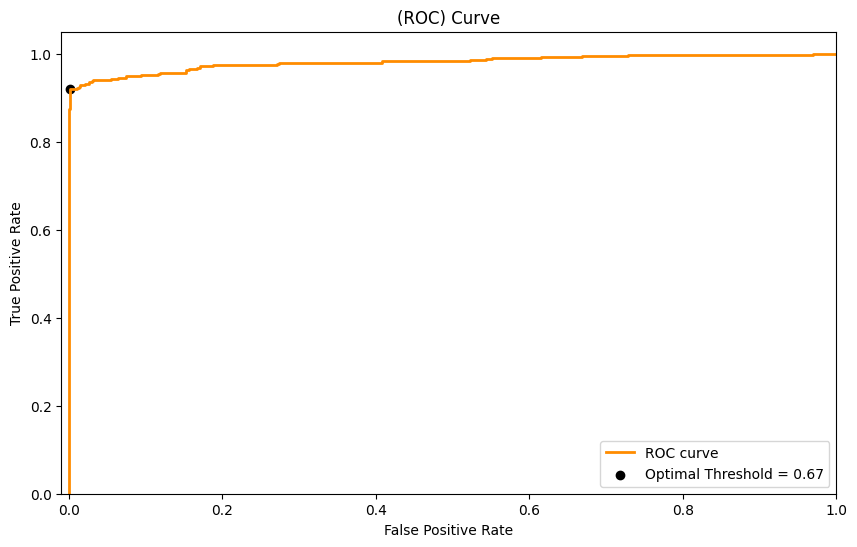

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black',
            label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##5.2 Preprocessing and prediction of the input

In [ ]:
def predict(input_data):
    df = pd.DataFrame([input_data])

    scaled_data = preprocessor.transform(df)

    scaled_data_df = pd.DataFrame(scaled_data, columns=['satisfaction_level', 'last_evaluation',
                                                        'number_project', 'average_montly_hours',
                                                        'time_spend_company', 'Work_accident',
                                                        'promotion_last_5years', 'Departments ', 'salary'])

    encoded_data = column_trans.transform(scaled_data_df)

    prediction = forest_model.predict_proba(encoded_data)

    decision ="Employee probably stay" if prediction[0][1] <= 0.66 else "Employee probably leave"
    return decision



##5.3 setting up Gradio interface

In [ ]:
import gradio as gr
def gradio_interface(satisfaction_level, last_evaluation, number_project,
                     average_montly_hours, time_spend_company,
                     work_accident, promotion_last_5years,
                     departments, salary):

    input_data = {
        'satisfaction_level': satisfaction_level,
        'last_evaluation': last_evaluation,
        'number_project': number_project,
        'average_montly_hours': average_montly_hours,
        'time_spend_company': time_spend_company,
        'Work_accident': work_accident,
        'promotion_last_5years': promotion_last_5years,
        'Departments ': departments,
        'salary': salary
    }

    return predict(input_data)

iface = gr.Interface(
    fn=gradio_interface,
    inputs=[
        gr.Slider(0.0, 1.0, step=0.01, label="Satisfaction Level"),
        gr.Slider(0.0, 1.0, step=0.01, label="Last Evaluation"),
        gr.Slider(1, 10, step=1, label="Number of Projects"),
        gr.Slider(0, 310, step=1, label="Average Monthly Hours"),
        gr.Slider(1, 10, step=1, label="Time Spent at Company (Years)"),
        gr.Radio([0, 1], label="Work Accident (0 No )(1 Yes)"),
        gr.Radio([0, 1], label="Promotion in Last 5 Years (0 No )(1 Yes)"),
        gr.Dropdown(choices=["IT", "support", "sales", "accounting", "management",
                                        "RandD", "technical", "product_mng", "marketing", "hr"],
                              label="Department"),
        gr.Radio(["low", "medium", "high"], label="Salary Level")
    ],
    outputs="text",

    title="Employee Churn Prediction",
    description="Input employee data to predict whether an employee will stay or leave."
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://259b40cd0d89f6bc14.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
